# DEMO 3

Decision Trees applied to Stock Market Data


In [1]:
import sys
import os

# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [ ]:
historical_prices = func_lib.createHistPrices()
list_of_momentums = [1, 5, 15, 20]
total_returns     = func_lib.computingReturns(historical_prices, list_of_momentums)
total_returns.dropna(inplace=True)

In [4]:
total_returns.head()

F_1_d_returns  1_d_returns  5_d_returns  15_d_returns  \
Ticker Date                                                                
A      2000-02-01       0.077465     0.072710     0.048938      0.029918   
       2000-02-02       0.016340     0.077465     0.119853      0.125000   
       2000-02-03      -0.019292     0.016340     0.136073      0.166979   
       2000-02-04       0.042623    -0.019292     0.120294      0.127542   
       2000-02-07      -0.006289     0.042623     0.201133      0.162705   

                   20_d_returns  
Ticker Date                      
A      2000-02-01     -0.013889  
       2000-02-02      0.150375  
       2000-02-03      0.246493  
       2000-02-04      0.270834  
       2000-02-07      0.223076

In [5]:
# Converting the 'F_1_d_returns' to binary based on whether the value is positive or not
total_returns['F_1_d_returns_Ind'] = total_returns['F_1_d_returns'].apply(lambda x: 1 if x > 0 else 0)
total_returns.head()

F_1_d_returns  1_d_returns  5_d_returns  15_d_returns  \
Ticker Date                                                                
A      2000-02-01       0.077465     0.072710     0.048938      0.029918   
       2000-02-02       0.016340     0.077465     0.119853      0.125000   
       2000-02-03      -0.019292     0.016340     0.136073      0.166979   
       2000-02-04       0.042623    -0.019292     0.120294      0.127542   
       2000-02-07      -0.006289     0.042623     0.201133      0.162705   

                   20_d_returns  F_1_d_returns_Ind  
Ticker Date                                         
A      2000-02-01     -0.013889                  1  
       2000-02-02      0.150375                  1  
       2000-02-03      0.246493                  0  
       2000-02-04      0.270834                  1  
       2000-02-07      0.223076                  0

In [6]:
# Determine the split index for 70% of the dates
unique_dates = total_returns.index.get_level_values('Date').unique()
split_date = unique_dates[int(0.7 * len(unique_dates))]
split_date

Timestamp('2017-01-20 00:00:00')

In [7]:
# Create the training set: all data before the split date
train_data = total_returns.loc[total_returns.index.get_level_values('Date') < split_date]

# Create the testing set: all data from the split date onwards
test_data = total_returns.loc[total_returns.index.get_level_values('Date') >= split_date]

In [8]:
total_returns  = test_data['F_1_d_returns']

In [10]:
features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target   = ['F_1_d_returns_Ind']

# Split the data into training and testing sets
X_train = train_data[features]
X_test  = test_data[features]
y_train = train_data[target]
y_test  = test_data[target]

In [11]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [12]:
# Initialize and train Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [13]:
model_name = 'DecTree'
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, index= X_test_scaled.index)

y_pred_df.rename(columns={0:model_name}, inplace=True)

y_test_df = pd.DataFrame(y_test)

In [14]:
y_test_and_pred = pd.merge(y_pred_df, total_returns, left_index=True, right_index=True)

In [15]:
# Define trading strategy based on Logit
def trading_strategy(y_pred):
    if y_pred > 0 :
        return  1 # Go long
    else:
        return  0  


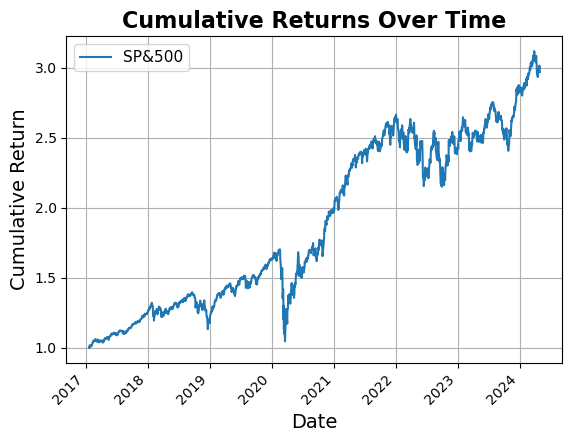

The CAGR is: 16.05%
Sharpe Ratio of Strategy: 0.85


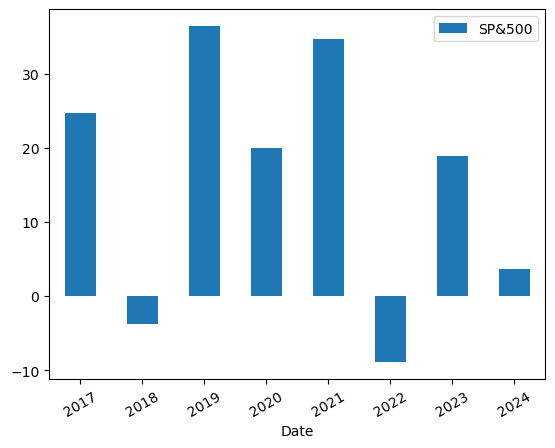

In [16]:
cum_returns, calendar_returns = func_lib.compute_BM_Perf(y_test_and_pred)

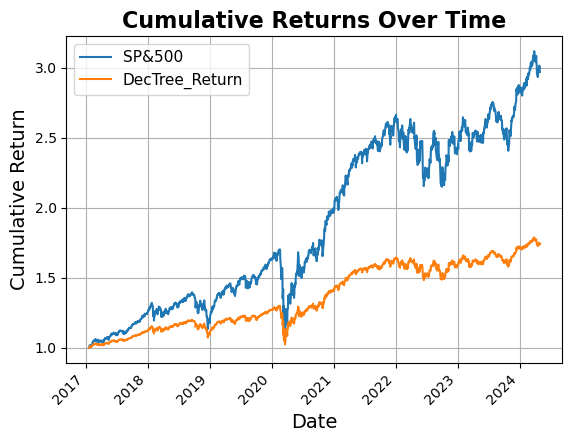

The CAGR is: 7.85%
Sharpe Ratio of Strategy: 0.8


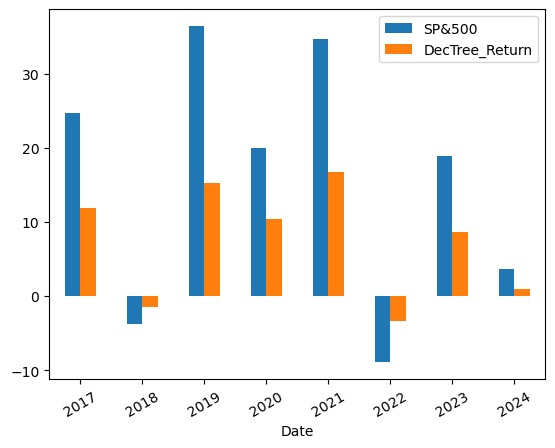

In [17]:
cum_returns, calendar_returns = func_lib.compute_strat_perf(y_test_and_pred, cum_returns, calendar_returns, trading_strategy, model_name)